# E8-4 PCA

Principal component analysis, or __PCA__, is a statistical technique converting
high dimensional data to low dimensional data by __selecting the most important features__, which provide maximum information about the dataset. <br><br>
The features are selected on the basis of __variance__, which they cause in the output. <br>
- the feature that causes highest variance is the first principal component 
- the feature that is responsible for second highest variance is considered the second principal component, and so on. <br><br>

> Principal components do not have any correlation with each other.<br>
> PCA works best on normalized features.<br>
> PCA requires numeric data only.

We will apply PCA in clustering sales data from the file _sales.csv_.

## Step 1: Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep

## Step 2: Data Preparation

In [ ]:
# Load data from a file
X = pd.read_csv('/Users/tdi/Documents/Teaching/AI/2020/Data/sales.csv')

In [ ]:
X.shape

In [ ]:
X.head()

In [ ]:
# Remove first column
X = X.drop(['Store id'], axis=1)
X.head()

In [ ]:
# Convert data frame to array
X = X.values
X

In [ ]:
# Plot the data
plt.figure()
plt.title('Input data')

# calculate the range of coordinates
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# plot coordinates
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# plot the points
plt.scatter(X[:,0], X[:,1], color='black', s=80, marker='o', facecolors='none')

plt.show()

### Data Normalization

Rescales the row data (vectors with at least one non zero component), keeping the proportions comparable and resistant to outliers: __xi/ sqrt( x ²i+y ²i+z ²i)__<br>
__Each sample__ (a row in the data matrix) is rescaled __independently__ of other samples so that its norm (l1 or l2 below) equals one.

In [ ]:
# Method L1: Least Absolute Deviation
# if we add the normalized values in each row, the sum of the new values is always 1
nl1 = prep.normalize(X, norm='l1')
nl1

In [ ]:
# Method L2: Least Squared Deviation 
# if we square each element in the vector (row), and summed them, the sum would equal 1
nl2 = prep.normalize(X, norm='l2')
nl2

### Data Scaling
Scaling makes the __values of the different features comparable__.

#### Standard Scaler

Standard features scaling transform the data, so that the distribution will have a mean value of 0 and a standard deviation of 1: __(xi–mean(x))/stdev(x)__<br>
See the illustration below.<br>
The Standard Scaler assumes that the data is normally distributed (follows a __Gaussian distribution__).

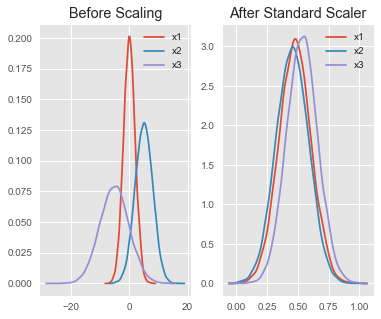
Source: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
X = sc.fit_transform(X)  
X

#### Min-Max Scaler

Min-Max Scaler uses the following formula for calculating each feature: __(xi–min(x))/ (max(x)–min(x))__<br>
By default, the data is transformed into a range [0, 1] or [-1, 1], if there are negative values).
See the illustration below.<br>
Can be used instead of Standard Scaler for __non-Gaussian distributions__.

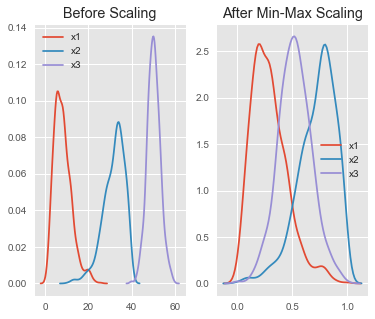
Source: https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1

### Feature Selection

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

In [ ]:
# The PCA class contains explained variance  ratio, which returns the variance caused by each of the principal components
explained_variance = pca.explained_variance_ratio_  
explained_variance

It can be seen that first principal component is responsible for 43.80% variance. Similarly, the second principal component causes 28.05% variance in the dataset. 

In [ ]:
# Plot the explained_variance
plt.plot(explained_variance, 'bx-', c='red')
plt.xlabel('component')
plt.ylabel('variance')
plt.title('The optimal number of components')
plt.show()

In [ ]:
# Plot the cumulative explained_variance
cumulative = np.cumsum(explained_variance)
plt.plot(cumulative, 'b*-', c='green')
plt.xlabel('components')
plt.ylabel('cumulative')
plt.title('The optimal number of components')
plt.show()

In [ ]:
# Let's use the first n components only
pca = PCA(n_components=4)  
X = pca.fit_transform(X)  

## Step 3: Train a Model

### Find optimal K

In [ ]:
# k means determine k
distortions = []
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
    # calculate silhouette score for each number of clusters
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

In [ ]:
# Plot the silhouette scores
plt.figure()
plt.bar(K, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

plt.show()

In [ ]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + K[0]
print('\nOptimal number of clusters =', num_clusters)

## Train a model

In [ ]:
# Train a model for two clusters
num_clusters = 2
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
model.fit(X)

## Implement the trained model for prediction

In [ ]:
Y = model.predict(X)

# see the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(model.labels_)

## Review the results

In [ ]:
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='viridis')

plt.grid(True)
plt.show()

In [ ]:
# See the cluster centres, created during the clustering
# cluster centres are stored in a variable named 'cluster_centers_'
print(model.cluster_centers_.round())

## Implement the model on new data

In [ ]:
# predict cluster of nonseen data
# test = model.predict([[1,  12449,  5207.45,  7594.67,  2492.51,  2888.06,  1201.32]])
#test = model.predict([[223.04,  7736.91,  5207.45,  7594.67,  2492.51,  2888.06,  1201.32]]) == 1
test = model.predict([[12449,  5207.45,  7594.67, 2492.51]])
print(test)

In [ ]:
test = model.predict([[223.04,  7736.91,  5207.45, 7594.67]]) == 1
print(test)

### Your Task: Experiment with different number of principal components

### Observe the effect of the components

## See More
https://medium.com/@ian.dzindo01/feature-scaling-in-python-a59cc72147c1